# Ford GoBike System Individual Trips Analysis - February 2019
## by (Louaye Lamaa)

## Investigation Overview

> The goal of this analysis is to find how the duration and time of the trips change depending on the users characteristics such as age, gender and user type.

## Dataset Overview

> The dataset contains information about the individual trips using Ford GoBike (known as Bay Wheels now), a regional public bike sharing system in the San Francisco Bay Area. All data are from February 2019. The dataset has 183412 observation (trips) and 16 attributes. These variables includes the start and end time of the trip, its duration, the start and end station as well as the characterstics of the users such as gender, age and user type (subscriber or customer). 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('fordGo_clean.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,duration_mins,day_date,day_name,hour,week_day_end,time,date,age,duration_quantile,log_duration_quantile
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,869.75,28,Thursday,17,Weekday,17:32:10.145000,2019-02-28 00:00:00.000,35.0,87.6478,1.942741
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,1030.90,28,Thursday,12,Weekday,12:13:13.218000,2019-02-28 00:00:00.000,47.0,87.6478,1.942741
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,608.17,28,Thursday,17,Weekday,17:54:26.010000,2019-02-28 00:00:00.000,30.0,87.6478,1.942741
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,26.42,28,Thursday,23,Weekday,23:54:18.549000,2019-02-28 00:00:00.000,45.0,26.4200,1.421933
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,29.88,28,Thursday,23,Weekday,23:49:58.632000,2019-02-28 00:00:00.000,60.0,29.8800,1.475381


In [3]:
def log_trans(x,inverse=False):
    """ Transform a column to log scale """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10,x)

## Age Affects the Trips Duration

> The younger users ride for longer duration on average. This is the reason why the female users who are youngers, bike for longer duration than the male users.

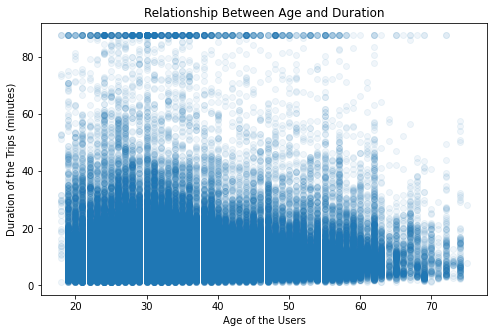

In [4]:
plt.figure(figsize=[8,5])
plt.scatter(data=df,x='age',y='duration_quantile',alpha=1/15);
plt.title('Relationship Between Age and Duration')
plt.xlabel('Age of the Users')
plt.ylabel('Duration of the Trips (minutes)');

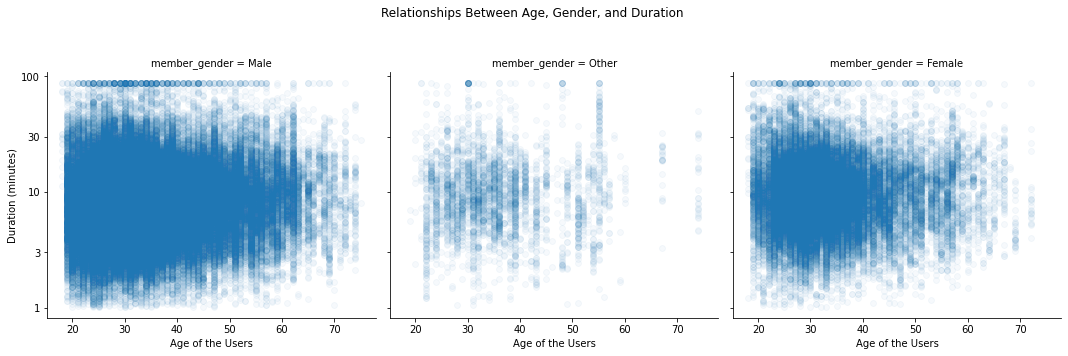

In [5]:
g=sb.FacetGrid(data=df,col='member_gender',height=5)
g.map(sb.regplot,'age','log_duration_quantile',scatter_kws={'alpha':1/25},fit_reg=False);
plt.yticks(log_trans(np.array([1,3,10,30,100])),
               [1,3,10,30,100]);
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Relationships Between Age, Gender, and Duration')
g.axes[0,0].set_xlabel('Age of the Users')
g.axes[0,1].set_xlabel('Age of the Users')
g.axes[0,2].set_xlabel('Age of the Users')
g.axes[0,2].set_xlabel('Age of the Users')
g.axes[0,0].set_ylabel('Duration (minutes)');

## The Day of the week and a Strong Relation with Duration and User Type

> The trips duration among customers is higher than the duration among subcribers The duration in the weekend, among both category,  is higher than the duration during the weekdays. So, The day of the week affects the duration of the trips. The reason will be reveal in the next visualization.

In [6]:
days_of_month = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
day_class = pd.api.types.CategoricalDtype(ordered=True,categories=days_of_month)
df['day_name'] = df['day_name'].astype(day_class)

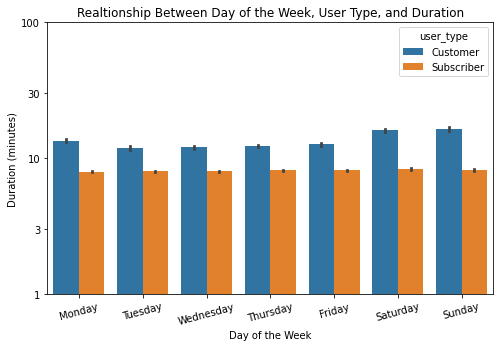

In [7]:
plt.figure(figsize=[8,5])
sb.barplot(data=df,x='day_name',y='log_duration_quantile',hue='user_type')
plt.yticks(log_trans(np.array([1,3,10,30,100])),
               [1,3,10,30,100]);
plt.xticks(rotation=15);
plt.title('Realtionship Between Day of the Week, User Type, and Duration')
plt.xlabel('Day of the Week')
plt.ylabel('Duration (minutes)');

## Pattern of biking by Day and Hour, the Purpose of Usage and the Relation with Duration 

> Although the visualization doesn't show the duration as a variable, but it is gives us a clearer picture for why the customers ride for longer trips. The pattern of usage by the hour of the day among customers and subscribers shows the customers ride more during the middle of the day while subscribers tend to use the bikes more at 8-9 am and 5-6 pm, which explains why the trips of the customers took more time as they use the bike for all purpose (sports or during leisure time) including work. The distribution of the trips between customers and subscribers prove that the duration here is affected by the purpose of each user type (and so the day of usage). This distribution shows that the customers bike much more during the weekend than the subscribers while the subscribers use these bikes during the weekday, specifically in the morning around 8 am and after noon around 5 pm. 

In [8]:
#creating a dataframe for each group
df_customer = df.query('user_type == "Customer"')
df_sub = df.query('user_type == "Subscriber"')

#prepare data to plot in heatmap
def pivotToHeatMap(data,*args):
    d = data.groupby([args[0],args[1]]).size()
    d= d.reset_index(name=args[2])
    d = d.pivot(index=args[0], columns=args[1], values=args[2])
    return d 

# for each uer type
customer_count = pivotToHeatMap(df_customer,'day_name','hour','count')
sub_count = pivotToHeatMap(df_sub,'day_name','hour','count')

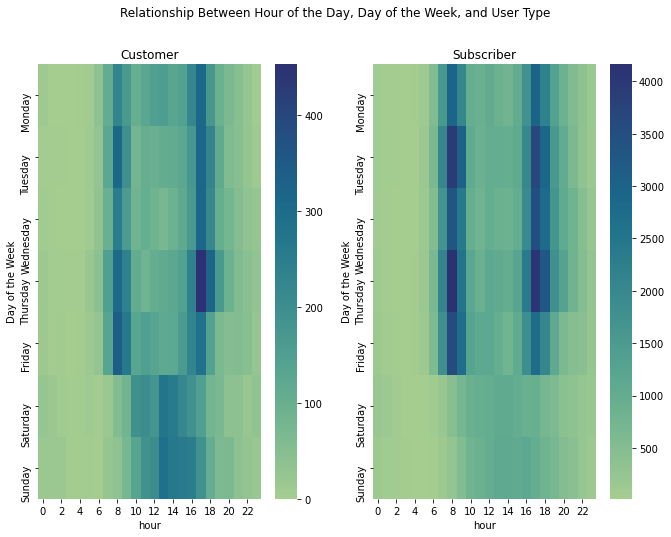

In [9]:
fig = plt.figure(figsize=[11,8]);
plt.subplot(1,2,1);
sb.heatmap(customer_count,cmap='crest');
plt.gca().set_title('Customer');
plt.ylabel('Day of the Week');
plt.subplot(1,2,2);
sb.heatmap(sub_count,cmap='crest');
plt.gca().set_title('Subscriber');
fig.suptitle('Relationship Between Hour of the Day, Day of the Week, and User Type');
plt.ylabel('Day of the Week');